In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv('Titanic.csv')

# # Step 2: Convert categorical data to numeric using label encoding
# # For simplicity, we'll use pandas' factorize for label encoding
# for column in df.columns:
#     if df[column].dtype == 'object':  # Check if the column is categorical
#         df[column], _ = pd.factorize(df[column])

# # Step 3: Save the processed dataframe to a new CSV file
# df.to_csv('Titanic_numeric.csv', index=False)

In [12]:
import numpy as np

# Load the Titanic dataset, skipping the header row
data = np.loadtxt('titanic_numeric.csv', delimiter=',', skiprows=1)

# Display the data
print(data)


[[ 1.      0.      3.     22.      7.25  ]
 [ 2.      1.      1.     38.     71.2833]
 [ 3.      1.      3.     26.      7.925 ]
 [ 4.      1.      1.     35.     53.1   ]
 [ 5.      0.      3.     35.      8.05  ]
 [ 6.      0.      3.     27.      8.4583]
 [ 7.      0.      1.     54.     51.8625]
 [ 8.      0.      3.      2.     21.075 ]
 [ 9.      1.      3.     27.     11.1333]
 [10.      1.      2.     14.     30.0708]]


In [13]:
x = data[:, 1:4]
y = data[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(7, 3) (3, 3) (7,) (3,)


In [14]:
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

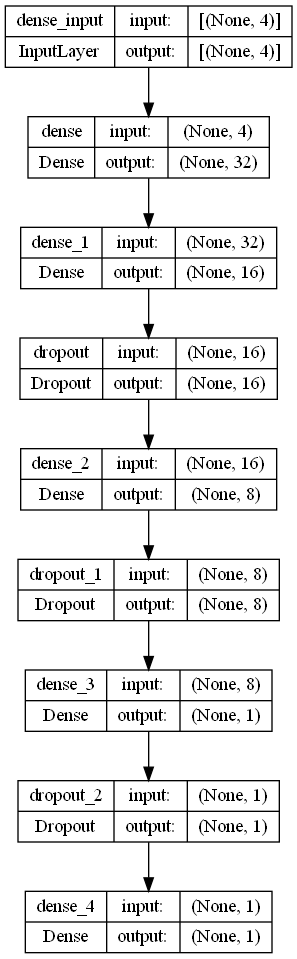

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True)


In [19]:
model = Sequential([
    Dense(64, input_shape=(3,), activation='relu'),  # Adjusted input shape to 3
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming a binary classification task
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, epochs=10, batch_size=5, verbose=0)


In [22]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('model loss : ')